In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import random
import scipy as sp

In [19]:
resp_df = pd.read_csv("Eval_Bandit/group_4_responses.csv",header=None)
reward_df = pd.read_csv("Eval_Bandit/group_4_reward.csv",header=None)

In [20]:
resp_df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
96,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
97,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
98,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0


In [93]:
reward_df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.273015,-0.641207,-0.558663,0.919413,-0.036962,-0.057131,0.379551,0.285560,0.097946,0.186005,...,0.244353,-0.952392,-0.771841,0.495677,0.461090,0.438314,0.943593,0.476655,-0.382962,0.259263
1,0.721906,0.323079,-0.030417,-0.191465,-0.591378,0.883801,0.628939,0.465293,0.295103,-0.189954,...,0.609346,0.554063,0.516468,0.536544,0.393140,-0.023914,-0.019257,-0.178421,0.111482,0.028057
2,0.170272,0.304888,-0.513665,0.173179,0.086719,-0.021794,0.735652,0.086147,-0.032337,0.127560,...,0.369226,0.193872,0.617612,0.101381,-0.013762,0.144157,-0.427943,0.396427,-0.114150,-0.105277
3,-0.316548,0.405251,-0.161932,-0.207003,-0.310207,0.210688,0.220792,-0.350762,0.651113,-0.539707,...,-0.675168,0.481360,0.210615,0.671238,0.051456,-0.140576,-0.272484,-0.534623,0.351377,0.430196
4,-0.203019,-0.682443,-0.123295,-0.534149,0.024856,-0.019597,-0.164434,-0.656771,0.877620,0.176330,...,0.417049,0.092988,0.576331,0.321104,0.886572,0.683315,0.706895,0.210036,0.482195,-0.065943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.029477,0.385012,0.044579,0.277947,0.439273,0.164984,0.588458,-0.663922,-0.681832,-0.288912,...,0.310752,0.055825,-0.074119,-0.664287,0.357860,0.209311,-0.563165,-0.397789,-0.236970,0.431679
96,0.221456,0.248762,0.703225,-0.162870,-0.462967,0.493886,0.189807,0.450565,-0.454239,0.570042,...,-0.924139,-0.623500,-0.573357,0.202688,-0.039211,0.730258,-0.232709,0.339279,0.759827,-0.533336
97,-0.109356,0.108927,-0.709870,0.204766,0.486792,0.328294,0.408620,-0.475763,0.372316,-0.069809,...,-0.110367,0.572233,0.693307,0.332928,-0.501392,-0.371526,-0.703611,-0.177681,-0.217914,0.341118
98,0.172962,-0.102964,0.663706,-0.876444,0.894402,0.746142,0.528149,0.787928,-0.842133,0.380881,...,0.265170,0.643450,0.035207,0.961617,-0.051698,0.573550,0.679036,0.302884,-0.420286,-0.378655


In [61]:
resp_df_one = resp_df
resp_df_zero = 1 - resp_df

In [65]:
resp_df_one.shape

(100, 200)

In [66]:
reward_df.shape

(100, 200)

0.2 -> 0.4

In [67]:
rewards_one = resp_df_one * reward_df
rewards_zero = resp_df_zero * reward_df

In [70]:
rewards_zero

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.273015,-0.000000,-0.000000,0.919413,-0.036962,-0.000000,0.379551,0.285560,0.097946,0.186005,...,0.244353,-0.952392,-0.771841,0.000000,0.000000,0.000000,0.000000,0.000000,-0.382962,0.000000
1,0.721906,0.323079,-0.030417,-0.191465,-0.000000,0.883801,0.628939,0.465293,0.295103,-0.189954,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.023914,-0.019257,-0.000000,0.111482,0.000000
2,0.170272,0.304888,-0.513665,0.000000,0.000000,-0.000000,0.735652,0.086147,-0.032337,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.000000,0.144157,-0.427943,0.000000,-0.000000,-0.105277
3,-0.000000,0.405251,-0.161932,-0.000000,-0.310207,0.000000,0.000000,-0.000000,0.651113,-0.539707,...,-0.675168,0.000000,0.000000,0.000000,0.000000,-0.140576,-0.000000,-0.534623,0.000000,0.000000
4,-0.203019,-0.000000,-0.123295,-0.000000,0.024856,-0.000000,-0.164434,-0.000000,0.877620,0.176330,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.029477,0.385012,0.044579,0.277947,0.439273,0.164984,0.588458,-0.663922,-0.000000,-0.288912,...,0.000000,0.000000,-0.000000,-0.664287,0.000000,0.000000,-0.000000,-0.397789,-0.000000,0.431679
96,0.221456,0.248762,0.703225,-0.162870,-0.000000,0.493886,0.000000,0.000000,-0.000000,0.570042,...,-0.000000,-0.623500,-0.000000,0.202688,-0.039211,0.000000,-0.232709,0.000000,0.759827,-0.533336
97,-0.109356,0.000000,-0.000000,0.204766,0.486792,0.328294,0.408620,-0.000000,0.372316,-0.069809,...,-0.110367,0.000000,0.000000,0.000000,-0.501392,-0.000000,-0.703611,-0.000000,-0.217914,0.000000
98,0.172962,-0.102964,0.000000,-0.000000,0.894402,0.746142,0.528149,0.787928,-0.000000,0.380881,...,0.000000,0.000000,0.000000,0.000000,-0.051698,0.000000,0.000000,0.000000,-0.000000,-0.378655


In [92]:
px.line(rewards_one.mean())

In [90]:
px.line(resp_df.mean(axis=0))

<Axes: >

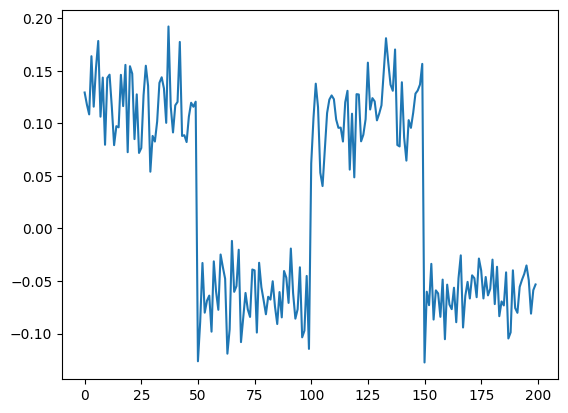

In [84]:
rewards_zero.mean().plot()

In [99]:
reward_df[reward_df[0]>0]

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
1,0.721906,0.323079,-0.030417,-0.191465,-0.591378,0.883801,0.628939,0.465293,0.295103,-0.189954,...,0.609346,0.554063,0.516468,0.536544,0.393140,-0.023914,-0.019257,-0.178421,0.111482,0.028057
2,0.170272,0.304888,-0.513665,0.173179,0.086719,-0.021794,0.735652,0.086147,-0.032337,0.127560,...,0.369226,0.193872,0.617612,0.101381,-0.013762,0.144157,-0.427943,0.396427,-0.114150,-0.105277
9,0.187220,0.391860,0.901672,0.895959,0.085543,0.068887,0.094504,0.503441,0.028437,0.030523,...,0.216442,-0.288179,0.275305,0.278751,0.653163,0.714792,0.242700,0.634356,-0.112293,0.100170
12,0.471460,0.601283,-0.060614,0.246639,-0.727541,-0.192068,-0.336678,-0.081708,-0.452499,0.376020,...,-0.155568,0.209961,0.205258,0.418683,-0.086901,0.921792,-0.348177,-0.904035,-0.228354,0.749631
13,0.789108,0.210892,0.295746,0.098946,-0.227573,-0.659642,0.208511,0.230117,0.435167,0.366658,...,-0.330354,-0.194297,-0.820782,0.049490,0.104280,0.274477,-0.033233,-0.263549,-0.567426,-0.217539
16,0.102878,0.214101,0.761288,0.112740,-0.364957,-0.234430,0.424595,0.559769,0.346957,-0.190806,...,-0.643355,0.688403,0.111748,0.550142,0.215475,-0.208577,0.358137,-0.328974,0.952294,-0.137123
19,0.666802,-0.356828,-0.090716,-0.448673,0.492620,0.135844,-0.539850,0.668378,0.414324,-0.051201,...,0.325236,-0.191603,0.969319,0.023932,-0.159633,0.709383,0.100955,-0.442659,0.448685,-0.113260
21,0.368592,-0.098617,-0.327010,0.594623,0.260398,0.649516,0.626583,0.449435,0.564783,0.550200,...,0.149028,-0.476875,0.330594,0.193514,-0.047443,0.451305,-0.590051,-0.168475,0.092710,-0.354885
24,0.194572,-0.570960,-0.412346,0.741284,-0.006259,0.389845,0.039035,-0.278504,-0.338079,0.335864,...,0.445547,0.708527,0.497189,0.184264,-0.295334,0.669657,0.520330,0.042032,0.499315,-0.051644
26,0.455056,-0.437704,-0.254619,0.069905,0.318046,-0.872138,0.612314,0.277149,0.072794,0.211681,...,0.249622,0.778993,-0.636896,-0.502597,0.519728,-0.046651,-0.100568,-0.512702,-0.240705,0.183898


In [62]:
resp_df_zero

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
96,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
97,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
98,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


<Axes: >

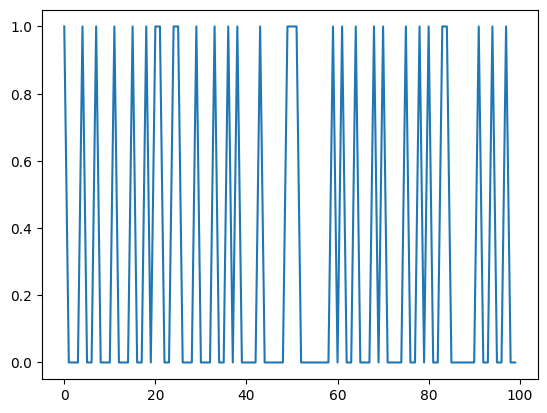

In [28]:
resp_df[1].plot()

In [22]:
reward_df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.273015,-0.641207,-0.558663,0.919413,-0.036962,-0.057131,0.379551,0.285560,0.097946,0.186005,...,0.244353,-0.952392,-0.771841,0.495677,0.461090,0.438314,0.943593,0.476655,-0.382962,0.259263
1,0.721906,0.323079,-0.030417,-0.191465,-0.591378,0.883801,0.628939,0.465293,0.295103,-0.189954,...,0.609346,0.554063,0.516468,0.536544,0.393140,-0.023914,-0.019257,-0.178421,0.111482,0.028057
2,0.170272,0.304888,-0.513665,0.173179,0.086719,-0.021794,0.735652,0.086147,-0.032337,0.127560,...,0.369226,0.193872,0.617612,0.101381,-0.013762,0.144157,-0.427943,0.396427,-0.114150,-0.105277
3,-0.316548,0.405251,-0.161932,-0.207003,-0.310207,0.210688,0.220792,-0.350762,0.651113,-0.539707,...,-0.675168,0.481360,0.210615,0.671238,0.051456,-0.140576,-0.272484,-0.534623,0.351377,0.430196
4,-0.203019,-0.682443,-0.123295,-0.534149,0.024856,-0.019597,-0.164434,-0.656771,0.877620,0.176330,...,0.417049,0.092988,0.576331,0.321104,0.886572,0.683315,0.706895,0.210036,0.482195,-0.065943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.029477,0.385012,0.044579,0.277947,0.439273,0.164984,0.588458,-0.663922,-0.681832,-0.288912,...,0.310752,0.055825,-0.074119,-0.664287,0.357860,0.209311,-0.563165,-0.397789,-0.236970,0.431679
96,0.221456,0.248762,0.703225,-0.162870,-0.462967,0.493886,0.189807,0.450565,-0.454239,0.570042,...,-0.924139,-0.623500,-0.573357,0.202688,-0.039211,0.730258,-0.232709,0.339279,0.759827,-0.533336
97,-0.109356,0.108927,-0.709870,0.204766,0.486792,0.328294,0.408620,-0.475763,0.372316,-0.069809,...,-0.110367,0.572233,0.693307,0.332928,-0.501392,-0.371526,-0.703611,-0.177681,-0.217914,0.341118
98,0.172962,-0.102964,0.663706,-0.876444,0.894402,0.746142,0.528149,0.787928,-0.842133,0.380881,...,0.265170,0.643450,0.035207,0.961617,-0.051698,0.573550,0.679036,0.302884,-0.420286,-0.378655


<Axes: >

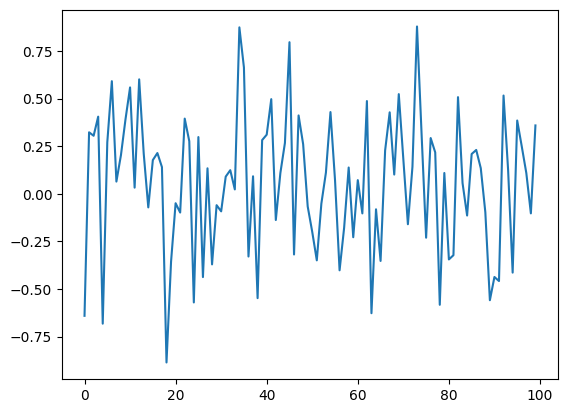

In [23]:
reward_df[1].plot()

In [59]:
reward_df.mean(axis=0).mean()

0.04923632228514327

<Axes: >

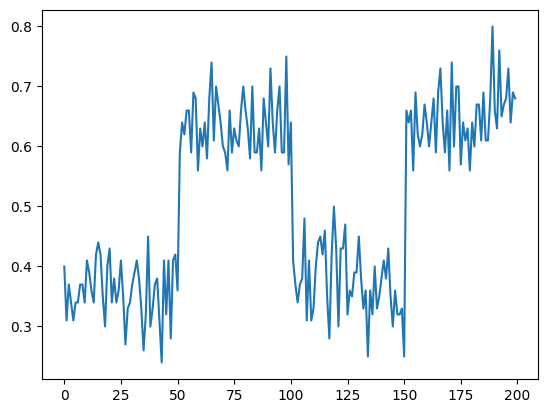

In [34]:
resp_df.mean(axis=0).plot()

In [86]:
pd.DataFrame(resp_df.mean(axis=0))

,0
0,0.40
1,0.31
2,0.37
3,0.34
4,0.31
...,...
195,0.68
196,0.73
197,0.64
198,0.69


<Axes: ylabel='Density'>

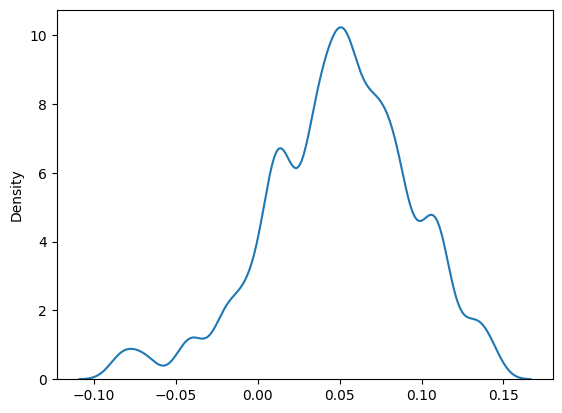

In [54]:
sns.kdeplot(data=reward_df.mean(axis=0), bw_adjust=0.5)

In [103]:
reward_df.mean(axis=0).mean()

0.04923632228514327

In [104]:
reward_df.mean(axis=0).std()

0.0447078859584446

<Axes: ylabel='Density'>

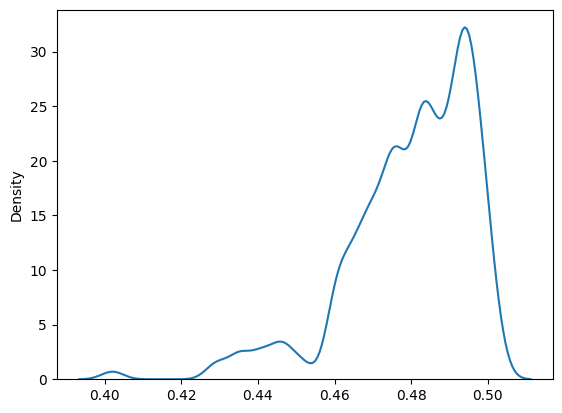

In [45]:
sns.kdeplot(data=resp_df.std(axis=0), bw_adjust=0.5)

In [46]:
def Mean_boostrapCI(name, n_boot):
    variable  = name
    allmeans = []
    for i in range(n_boot):
        sample = np.mean(np.random.choice(variable.values, size=len(variable), replace=True))
        allmeans.append(sample)
    allmeans = allmeans[25:975]
    confidence_interval = [min(allmeans), max(allmeans)] # find CI
    return (confidence_interval)

In [56]:
Mean_boostrapCI(reward_df.sum(axis=0),10000)

[4.0777429982822815, 5.930825998976063]

In [35]:
resp_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.400000,0.310000,0.370000,0.340000,0.310000,0.340000,0.340000,0.370000,0.370000,0.340000,...,0.660000,0.630000,0.760000,0.650000,0.670000,0.680000,0.730000,0.640000,0.690000,0.680000
std,0.492366,0.464823,0.485237,0.476095,0.464823,0.476095,0.476095,0.485237,0.485237,0.476095,...,0.476095,0.485237,0.429235,0.479372,0.472582,0.468826,0.446196,0.482418,0.464823,0.468826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
reward_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.035852,0.058865,0.002002,0.143225,0.045201,0.063776,0.134407,0.012950,0.061501,0.027243,...,0.009244,0.101361,0.141331,0.098535,0.111704,0.129702,0.052567,0.038824,0.128384,0.038782
std,0.424662,0.362223,0.476605,0.436978,0.414423,0.464374,0.434449,0.442916,0.419876,0.388547,...,0.397291,0.427862,0.436898,0.384758,0.366974,0.388289,0.453489,0.407244,0.437596,0.389964
min,-0.917542,-0.886401,-0.971575,-0.987489,-0.911922,-0.920023,-0.951081,-0.936893,-0.866254,-0.765546,...,-0.924139,-0.952392,-0.959128,-0.759846,-0.866013,-0.764498,-0.814212,-0.904035,-0.768703,-0.823330
25%,-0.274170,-0.164617,-0.325594,-0.126596,-0.237001,-0.231560,-0.171722,-0.308419,-0.214383,-0.233247,...,-0.257165,-0.217622,-0.140693,-0.149654,-0.152609,-0.096866,-0.291573,-0.298885,-0.230508,-0.205600
50%,0.101676,0.109179,-0.013768,0.176244,0.042079,0.063191,0.133070,0.083675,0.050920,-0.000743,...,0.001995,0.109126,0.213012,0.131910,0.088100,0.121420,0.046166,0.085545,0.138931,0.028053
75%,0.280523,0.294233,0.297037,0.401836,0.345418,0.396567,0.435320,0.416015,0.358858,0.336262,...,0.295846,0.463865,0.456352,0.334604,0.391606,0.398072,0.381858,0.332029,0.440331,0.288058
max,0.922756,0.879134,0.977327,0.949527,0.894402,0.997324,0.963834,0.847343,0.994976,0.830064,...,0.816549,0.839213,0.969319,0.985964,0.886572,0.921792,0.984046,0.893423,0.986383,0.915034


# Bootstrap thing

In [105]:
import scipy as sp

In [ ]:
sp.stats.ttest_ind

# SIM

In [106]:
def simulate(rounds):

  # Nombre de tours du jeu
  num_rounds = rounds

  # Initialisation des variables
  lever = random.choice([0, 1])  # Commence avec un levier aléatoire (0 ou 1)
  wins = []  # Liste pour stocker les gains au fil du temps
  lever_choices = []  # Stocke les choix du joueur
  rewards = []
  polarity = 1

  # Simulation du jeu
  for x in range(num_rounds):
    LeverA = np.random.normal(0.2, 0.4)*polarity
    LeverB = np.random.normal(-0.2, 0.4)*polarity
    if x%50 == 0 :
      polarity *= -1

      # Assigner la récompense selon le levier choisi
    if lever == 0:
      reward = LeverA
    else:
      reward = LeverB

      # Vérifier si c'est un gain (reward > 0)
    win = 1 if reward > 0 else 0

      # Stocker les résultats
    wins.append(win)
    rewards.append(reward)
    lever_choices.append(lever)

      # Appliquer la stratégie "Win-Stay, Lose-Change"
    if win == 0:  # Si on perd, on change de levier
      lever = 1 - lever  # Change entre 0 et 1

  return wins, lever_choices, rewards

In [ ]:
def simulate_noisy(rounds, noise_pctg):
    num_rounds = rounds
    lever = random.choice([0, 1])
    wins = []
    lever_choices = []
    rewards = []
    polarity = 1

    for x in range(num_rounds):
        random_noise = np.random.rand()
        LeverA = np.random.normal(0.2, 0.4) * polarity
        LeverB = np.random.normal(-0.2, 0.4) * polarity

        if x % 50 == 0:
            polarity *= -1

        reward = LeverA if lever == 0 else LeverB
        win = 1 if reward > 0 else 0

        wins.append(win)
        rewards.append(reward)
        lever_choices.append(lever)

        if win == 0:
            if random_noise <= (1 - noise_pctg):
                lever = 1 - lever
            else:
                lever = random.choice([0, 1])

    return wins, lever_choices, rewards

In [109]:
sim_wins = []
sim_choices = []
sim_rewards = []
for x in range(100):
  a,b,c = simulate(200)
  sim_wins.append(a)
  sim_choices.append(b)
  sim_rewards.append(c)

In [245]:
sim_wins_noisy = []
sim_choices_noisy = []
sim_rewards_noisy = []
for x in range(100):
  a,b,c = simulate_noisy(200,20)
  sim_wins_noisy.append(a)
  sim_choices_noisy.append(b)
  sim_rewards_noisy.append(c)

In [200]:
sim_wins_noisy_tw = []
sim_choices_noisy_tw = []
sim_rewards_noisy_tw = []
for x in range(100):
  a,b,c = simulate_noisy(200,12)
  sim_wins_noisy_tw.append(a)
  sim_choices_noisy_tw.append(b)
  sim_rewards_noisy_tw.append(c)

In [201]:
sim_wins_noisy_ft = []
sim_choices_noisy_ft = []
sim_rewards_noisy_ft = []
for x in range(100):
  a,b,c = simulate_noisy(200,5)
  sim_wins_noisy_ft.append(a)
  sim_choices_noisy_ft.append(b)
  sim_rewards_noisy_ft.append(c)

In [195]:
sim1=pd.DataFrame(sim_choices)

<Axes: >

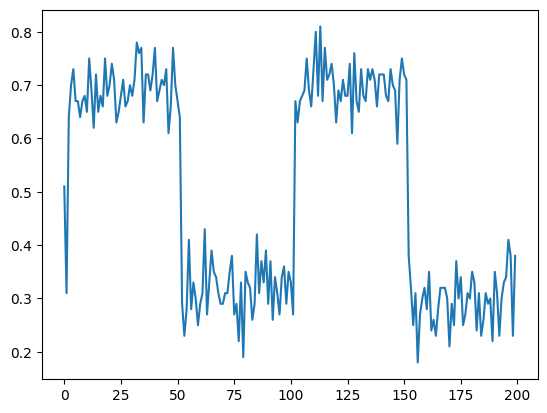

In [196]:
sim1.mean(axis=0).plot()

<Axes: >

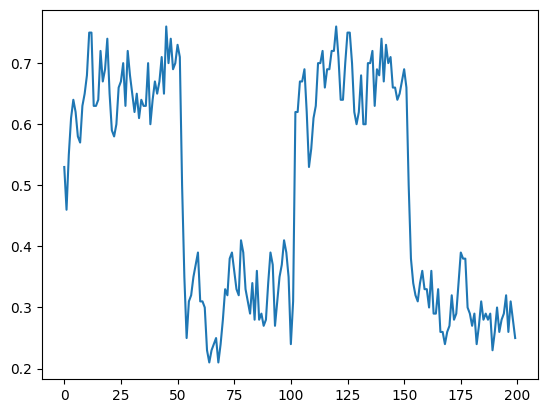

In [221]:
pd.DataFrame(sim_choices_noisy_ft).mean(axis=0).plot()

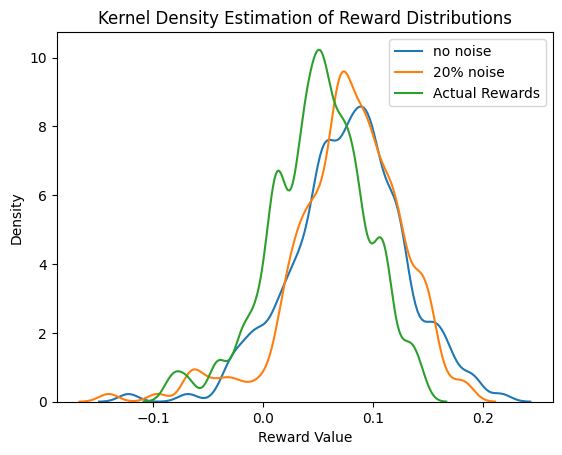

In [247]:
sns.kdeplot(data=pd.DataFrame(sim_rewards).mean(axis=0), bw_adjust=0.5, label="no noise")
sns.kdeplot(data=pd.DataFrame(sim_rewards_noisy_tw).mean(axis=0), bw_adjust=0.5, label="20% noise")
#sns.kdeplot(data=pd.DataFrame(sim_rewards_softmax).mean(axis=0), bw_adjust=0.5, label="softmax")
#sns.kdeplot(data=pd.DataFrame(sim_rewards_noisy_ft).mean(axis=0), bw_adjust=0.5, label="5% noise")
sns.kdeplot(data=reward_df.mean(axis=0), bw_adjust=0.5, label="Actual Rewards")

plt.legend()
plt.xlabel("Reward Value")
plt.ylabel("Density")
plt.title("Kernel Density Estimation of Reward Distributions")
plt.show()

In [224]:
def softmax(x, beta=1.0):
    exp_x = np.exp(beta * (x - np.max(x)))
    return exp_x / np.sum(exp_x)

def simulate_softmax(rounds, beta, alpha=0.1):
    num_rounds = rounds
    lever = random.choice([0, 1])
    wins = []
    lever_choices = []
    rewards = []
    polarity = 1
    lever_values = [0, 0]  # Initial expected values for each lever

    for x in range(num_rounds):
        LeverA = np.random.normal(0.2, 0.4) * polarity
        LeverB = np.random.normal(-0.2, 0.4) * polarity

        if x % 50 == 0:
            polarity *= -1

        reward = LeverA if lever == 0 else LeverB
        win = 1 if reward > 0 else 0

        wins.append(win)
        rewards.append(reward)
        lever_choices.append(lever)

        # Exponential moving average update (prevents bias toward early rewards)
        lever_values[lever] = (1 - alpha) * lever_values[lever] + alpha * reward

        # Compute softmax probabilities and sample next lever
        probs = softmax(lever_values, beta=beta)
        lever = np.random.choice([0, 1], p=probs)

    return wins, lever_choices, rewards


In [232]:
sim_wins_softmax = []
sim_choices_softmax = []
sim_rewards_softmax = []
for x in range(100):
  a,b,c = simulate_softmax(200, beta=7)
  sim_wins_softmax.append(a)
  sim_choices_softmax.append(b)
  sim_rewards_softmax.append(c)

<Axes: ylabel='Density'>

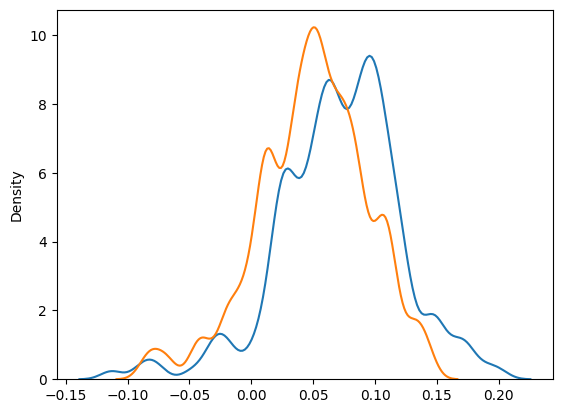

In [230]:
sns.kdeplot(data=pd.DataFrame(sim_rewards_noisy).mean(axis=0), bw_adjust=0.5)
sns.kdeplot(data=reward_df.mean(axis=0), bw_adjust=0.5)

<Axes: ylabel='Density'>

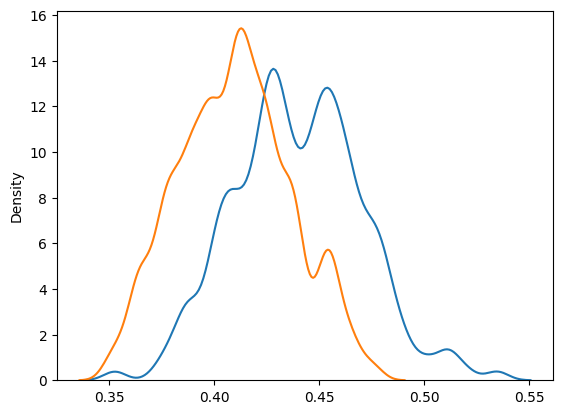

In [152]:
sns.kdeplot(data=pd.DataFrame(sim_rewards).std(axis=0), bw_adjust=0.5)
sns.kdeplot(data=reward_df.std(axis=0), bw_adjust=0.5)

<Axes: ylabel='Density'>

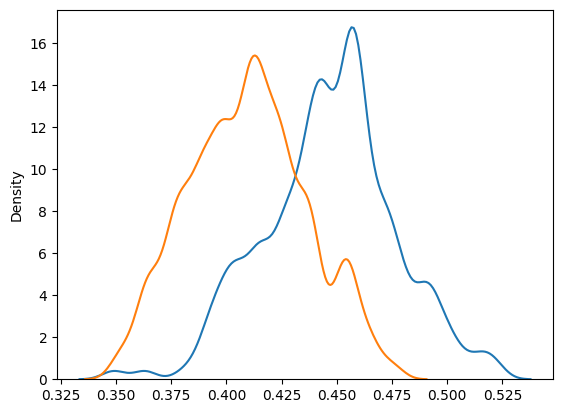

In [161]:
sns.kdeplot(data=pd.DataFrame(sim_rewards_noisy).std(axis=0), bw_adjust=0.5)
sns.kdeplot(data=reward_df.std(axis=0), bw_adjust=0.5)

<Axes: ylabel='Density'>

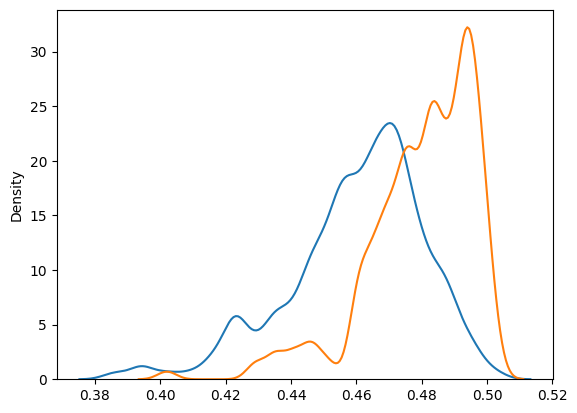

In [154]:
sns.kdeplot(data=pd.DataFrame(sim_choices).std(axis=0), bw_adjust=0.5)
sns.kdeplot(data=resp_df.std(axis=0), bw_adjust=0.5)

In [162]:
A = reward_df.mean(axis=0)
B = pd.DataFrame(sim_rewards_noisy).mean(axis=0)

In [163]:
ttest = sp.stats.ttest_ind(A,B)

In [164]:
ttest

TtestResult(statistic=11.191376382319271, pvalue=1.831957205548787e-25, df=398.0)